In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv('dataset.csv', index_col=0, parse_dates=True)

In [74]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

class Test:
    def __init__(self, func=None):
        df = pd.read_csv('dataset.csv', index_col=0, parse_dates=True)
        start_date = df.index.min()
        end_date = df.index.max()
        all_dates = pd.date_range(start=start_date, end=end_date, freq='D')
        self.df = df.reindex(all_dates).fillna(method='ffill')
        self.func = func

    def get_weight(self, df, func):
        weight = func(df)
        return weight
    
    def _calculate(self, func, tickers=None, rebalancing=False):
        port_price = []
        if tickers==None: df = self.df
        else: df = self.df[tickers]

        _weights = np.array(self.get_weight(df.iloc[0], func))

        for i in range(len(df.index)):
            _price = np.array(df.iloc[i])
            _return = np.sum(_price*_weights)

            port_price.append(_return)

            if rebalancing:
                if self.is_month_end(df.index[i]):
                    _weights = np.array(self.get_weight(df.iloc[i], func))

        return pd.DataFrame(port_price, index=df.index, columns=['My Portpolio'])
    
    def run(self, tickers=None, rebalance=False, func=None):
        if func!=None: self.func=func

        self.bt_df = self._calculate(self.func, tickers, rebalance)
        self.plot()

        return self.bt_df

    def is_month_end(self, date):
        date = pd.to_datetime(date)
        next_month = date + pd.offsets.MonthBegin(1)
        last_day_of_month = next_month - pd.Timedelta(days=1)
        return date == last_day_of_month

    def get_df(self):
        return self.df

In [75]:
def six_four(df):
    return [0.6, 0.4]

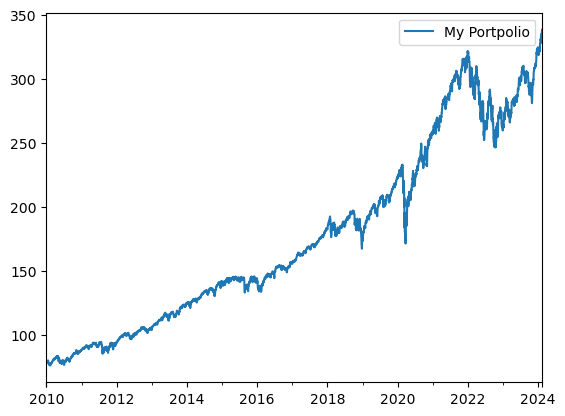

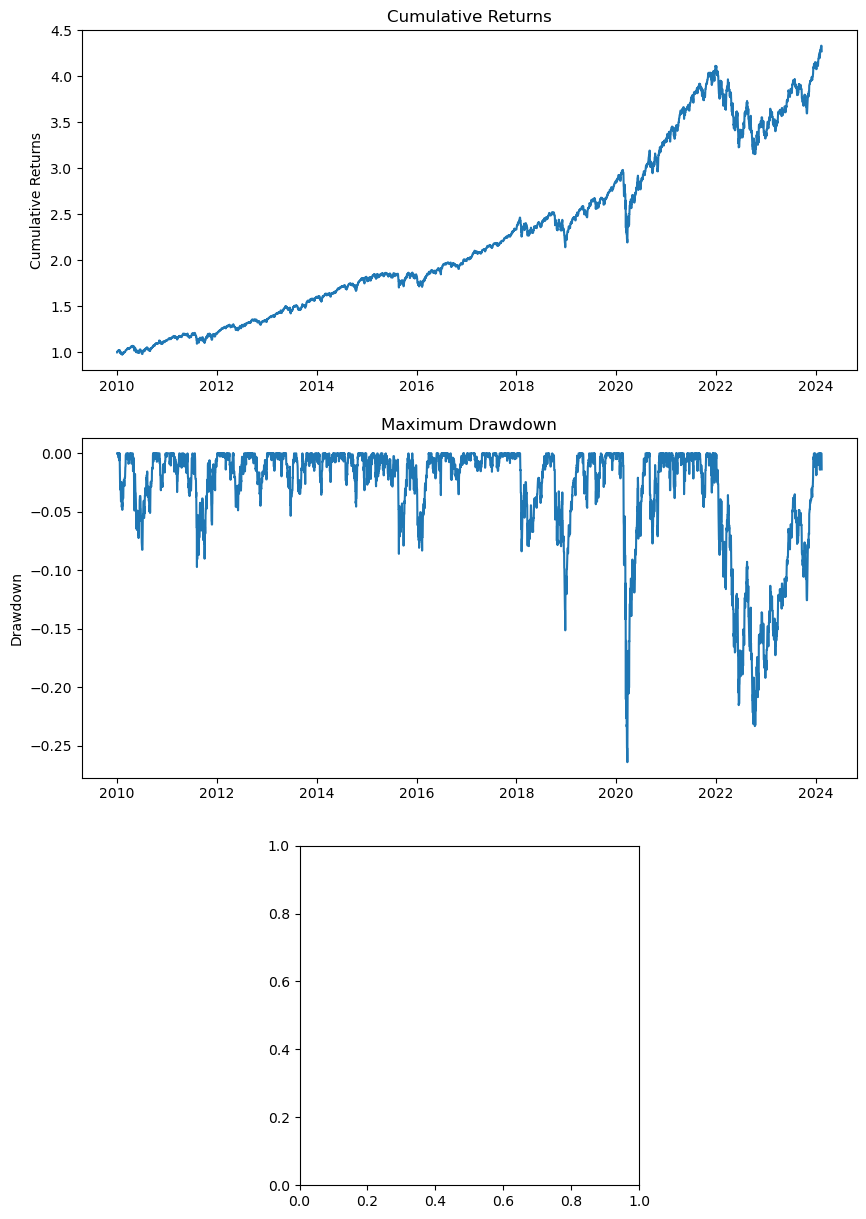

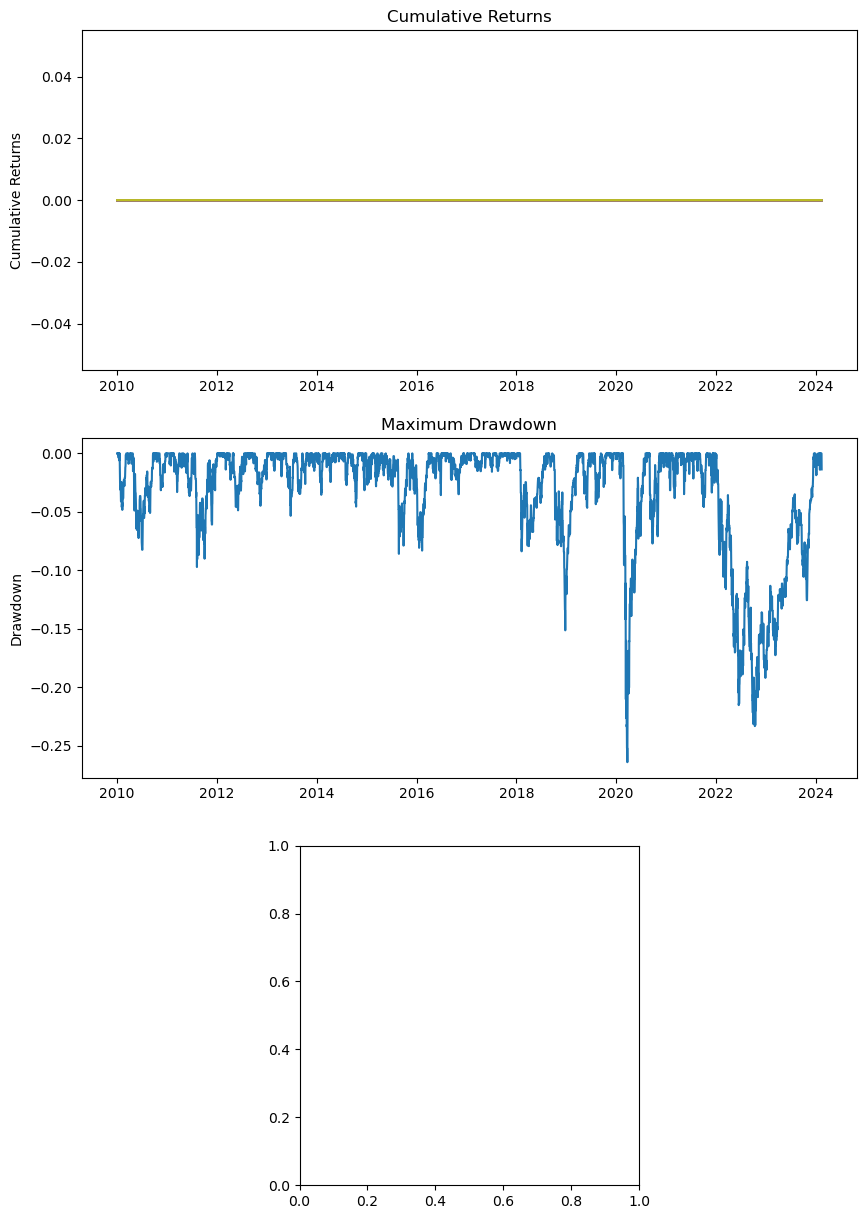

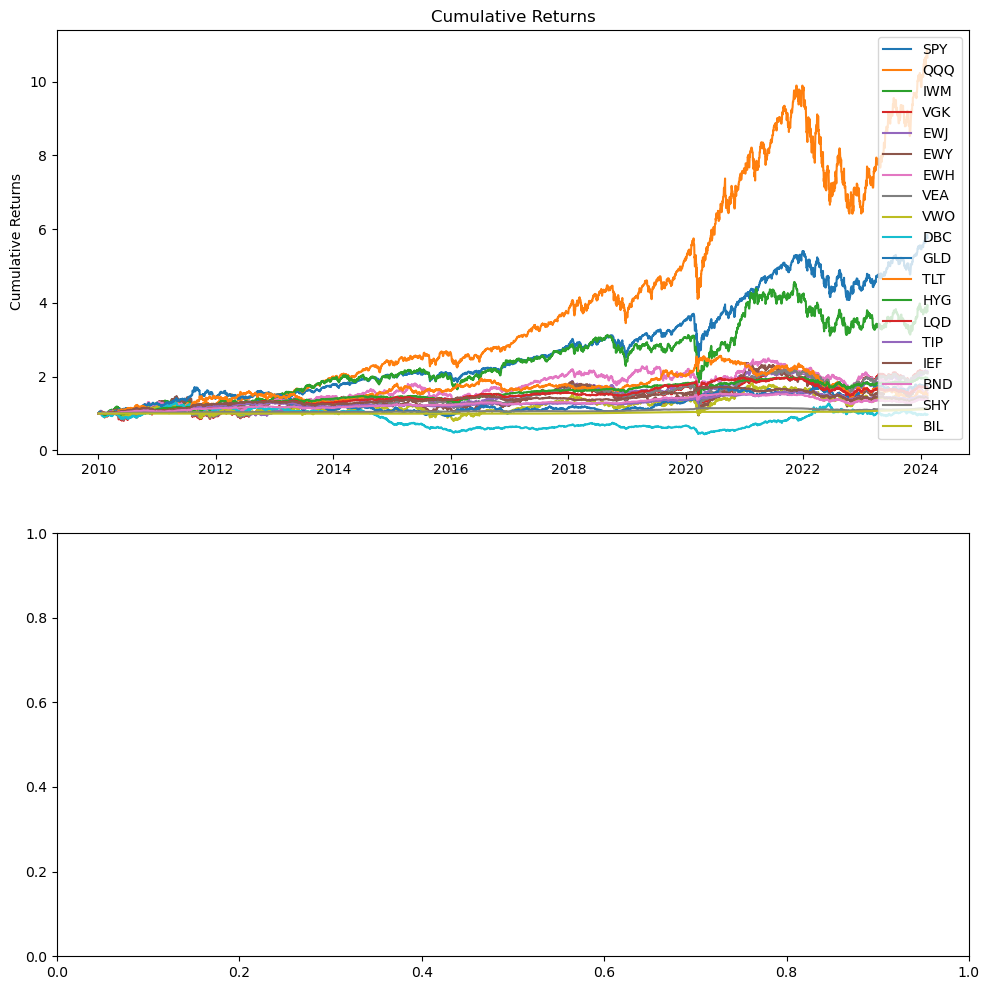

In [76]:
t = Test(six_four)
a = t.run(tickers=['SPY', 'IEF'])

In [67]:
def calculate_performance_metrics(portfolio_values):
    daily_returns = portfolio_values.pct_change().dropna()
    annualized_return = np.power(1 + daily_returns.mean(), 252) - 1
    cumulative_returns = (1 + daily_returns).cumprod()
    rolling_max = cumulative_returns.cummax()
    drawdown = (cumulative_returns - rolling_max) / rolling_max
    mdd = drawdown.min()
    volatility = daily_returns.std() * np.sqrt(252)
    return annualized_return, mdd, volatility